In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
directory = '/kaggle/input/hand-gesture-recognition/HandGesture/images'

In [8]:
Name=[]
for file in os.listdir(directory):
    if file[-4:]!='pt.m' and file[-4:]!='.txt':
        Name+=[file]
print(Name)
print(len(Name))

['scissor', 'thumbs', 'paper', 'rock', 'rock_on', 'fingers_crossed', 'call_me', 'up', 'okay', 'peace']
10


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
File=[]
for file in os.listdir(directory):
    File+=[file]
    print(file)

scissor
thumbs
paper
rock
rock_on
fingers_crossed
call_me
up
okay
peace


In [11]:
dataset = []
testset = []
count = 0

for file in File:
    path = os.path.join(directory, file)
    t = 0
    for im in os.listdir(path):
        if im[-4:] != 'pt.m' and im[-4:] != '.txt':
            # Load and preprocess the image
            image = load_img(os.path.join(path, im), color_mode='rgb', target_size=(60, 60))
            image = img_to_array(image)
            image = image / 255.0  # Normalize pixel values
            
            # Append to the dataset or testset
            if t < 400:
                dataset.append([image, count])
            else:   
                testset.append([image, count])
            t += 1
    count += 1

In [12]:
data,labels0=zip(*dataset)
test,tlabels0=zip(*testset)

In [13]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [14]:
tlabels1=to_categorical(tlabels0)
test=np.array(test)
tlabels=np.array(tlabels1)

In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(3200, 60, 60, 3)
(800, 60, 60, 3)
(3200, 10)
(800, 10)


In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [24]:
pretrained_model3 = tf.keras.applications.VGG16(
    input_shape=(60, 60, 3),  # Input shape of your images
    include_top=False,  # Exclude the fully connected layer
    weights='imagenet',  # Use weights pre-trained on ImageNet
    pooling='avg'  # Use global average pooling
)

# Count the total number of layers
total_layers = len(pretrained_model3.layers)

# Freeze all layers except the last 10
for layer in pretrained_model3.layers[:total_layers - 10]:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [25]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)  # First new dense layer
x3 = tf.keras.layers.Dense(64, activation='relu')(x3) # second new dense layer
x3 = tf.keras.layers.Dense(36, activation='relu')(x3)  # third new dense layer
x3 = tf.keras.layers.Dense(64, activation='relu')(x3)  # third new dense layer

outputs3 = tf.keras.layers.Dense(10, activation='softmax')(x3)  # Output layer

# Create the final model
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [26]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=20)

Epoch 1/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.1256 - loss: 2.2743 - val_accuracy: 0.1350 - val_loss: 2.2876
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.2278 - loss: 2.0011 - val_accuracy: 0.3762 - val_loss: 1.5851
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.4225 - loss: 1.4045 - val_accuracy: 0.5125 - val_loss: 1.1139
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5527 - loss: 1.1750 - val_accuracy: 0.6625 - val_loss: 0.7992
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6783 - loss: 0.8532 - val_accuracy: 0.6075 - val_loss: 1.0332
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7115 - loss: 0.8134 - val_accuracy: 0.7487 - val_loss: 0.5870
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.6533 - loss: 1.0480 - val_accuracy: 0.8012 - val_loss: 0.5800
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.7557 - loss: 0.7001 - val_acc

In [27]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
              precision    recall  f1-score   support

           0       0.98      0.72      0.83        71
           1       0.86      0.98      0.92        65
           2       1.00      1.00      1.00        91
           3       1.00      1.00      1.00        89
           4       0.87      0.98      0.92        84
           5       0.94      1.00      0.97        87
           6       0.94      0.93      0.94        73
           7       1.00      0.91      0.95        79
           8       1.00      0.99      0.99        83
           9       0.95      0.99      0.97        78

    accuracy                           0.95       800
   macro avg       0.95      0.95      0.95       800
weighted avg       0.96      0.95      0.95       800



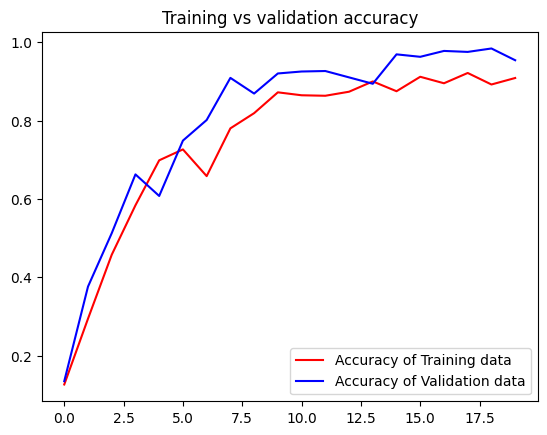

<Figure size 640x480 with 0 Axes>

In [28]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

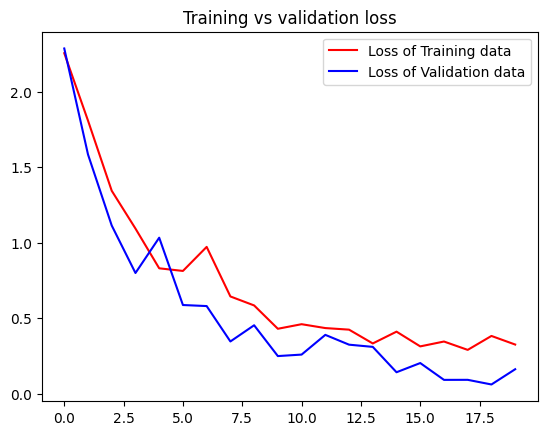

<Figure size 640x480 with 0 Axes>

In [29]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

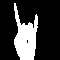

In [30]:
load_img("../input/hand-gesture-recognition/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

In [31]:
image=load_img("../input/hand-gesture-recognition/HandGesture/images/rock_on/1317.jpg",target_size=(60,60))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [32]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction is rock_on.


In [33]:
print(test.shape)
prediction2=model.predict(test)
print(prediction2.shape)

PRED=[]
for item in prediction2:
    value2=np.argmax(item)      
    PRED+=[value2]

(1243, 60, 60, 3)
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step
(1243, 10)


In [34]:
ANS=tlabels0

In [35]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9525341914722446


### Model save and load

In [36]:
model.save('handgest_transfer4.hdf5')
model2 = keras.models.load_model('handgest_transfer4.hdf5')

In [37]:
prediction3=model2.predict(test)

PRED3=[]
for item in prediction3:
    value3=np.argmax(item)      
    PRED3+=[value3]

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [38]:
accuracy3=accuracy_score(ANS,PRED3)
print(accuracy3)

0.9525341914722446
